In [1]:
library(emmeans)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
'SCP1052.lung.example.long.csv' %>% read_csv -> data

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  barcodekey = col_character(),
  SubCluster = col_character(),
  n_UMI = col_double(),
  donor = col_character(),
  disease = col_character(),
  source = col_character(),
  gene = col_character(),
  count = col_double(),
  short_name = col_character()
)




In [3]:
data %>% filter(gene == 'SFTPC') -> d_
glm('count ~ offset(log(n_UMI)) + short_name', family = poisson, data = d_) -> fit1

fit1 %>% summary


Call:
glm(formula = "count ~ offset(log(n_UMI)) + short_name", family = poisson, 
    data = d_)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.2748   -0.2620   -0.1524   -0.0740   27.7121  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -10.47432    0.17961 -58.319  < 2e-16 ***
short_nameAT2     5.02864    0.18024  27.900  < 2e-16 ***
short_nameB      -0.07782    0.33043  -0.236 0.813812    
short_nameCD4+T  -0.29721    0.48193  -0.617 0.537429    
short_nameCD8+T -12.87551  111.96668  -0.115 0.908450    
short_nameFib    -3.18939    1.01600  -3.139 0.001694 ** 
short_nameMac     0.10991    0.32200   0.341 0.732857    
short_nameMon    -1.96229    0.53128  -3.694 0.000221 ***
short_nameMyof   -1.15032    0.48193  -2.387 0.016991 *  
short_nameNK     -1.64338    1.01600  -1.617 0.105771    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)



In [4]:
fit1 %>% emmeans(specs = ~ short_name, offset = log(1)) %>% summary(type = 'response') %>% mutate(gene = 'SFTPC')

,short_name,rate,SE,df,asymp.LCL,asymp.UCL,gene
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AT1,2.825266e-05,5.074327e-06,Inf,1.986913e-05,4.017349e-05,SFTPC
2,AT2,4.314904e-03,6.513110e-05,Inf,4.189120e-03,4.444466e-03,SFTPC
3,B,2.613743e-05,7.249219e-06,Inf,1.517686e-05,4.501360e-05,SFTPC
4,CD4+T,2.098856e-05,9.386370e-06,Inf,8.736023e-06,5.042566e-05,SFTPC
5,CD8+T,7.232647e-11,8.098144e-09,Inf,2.220446e-16,1.463473e+85,SFTPC
6,Fib,1.163919e-06,1.163919e-06,Inf,1.639538e-07,8.262747e-06,SFTPC
7,Mac,3.153494e-05,8.428067e-06,Inf,1.867664e-05,5.324578e-05,SFTPC
8,Mon,3.970527e-06,1.985263e-06,Inf,1.490210e-06,1.057910e-05,SFTPC
9,Myof,8.942928e-06,3.999399e-06,Inf,3.722295e-06,2.148566e-05,SFTPC


In [5]:
fit_model <- function (gene_name) {
    data %>% filter(gene == gene_name) -> d_
    glm('count ~ offset(log(n_UMI)) + short_name', family = poisson, data = d_) -> fit1
    fit1 %>% emmeans(specs = ~ short_name, offset = log(1)) %>% summary(type = 'response') %>% mutate(gene = gene_name) -> model_summary
    
    model_summary
}

In [6]:
data %>% pluck('gene') %>% unique %>% lapply(fit_model) %>% bind_rows -> results

In [7]:
results %>% head

,short_name,rate,SE,df,asymp.LCL,asymp.UCL,gene
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AT1,2.825266e-05,5.074327e-06,Inf,1.986913e-05,4.017349e-05,SFTPC
2,AT2,4.314904e-03,6.513110e-05,Inf,4.189120e-03,4.444466e-03,SFTPC
3,B,2.613743e-05,7.249219e-06,Inf,1.517686e-05,4.501360e-05,SFTPC
4,CD4+T,2.098856e-05,9.386370e-06,Inf,8.736023e-06,5.042566e-05,SFTPC
5,CD8+T,7.232647e-11,8.098144e-09,Inf,2.220446e-16,1.463473e+85,SFTPC
6,Fib,1.163919e-06,1.163919e-06,Inf,1.639538e-07,8.262747e-06,SFTPC


In [8]:
gene_order = c(
    'SFTPC', 'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1', 'CD163',
    'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'CXCL2'
)

ct_order = c(
    'AT1', 'AT2', 'B', 'CD4+T', 'CD8+T', 'Mon', 'NK', 'Fib', 'Myof', 'Mac'
)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


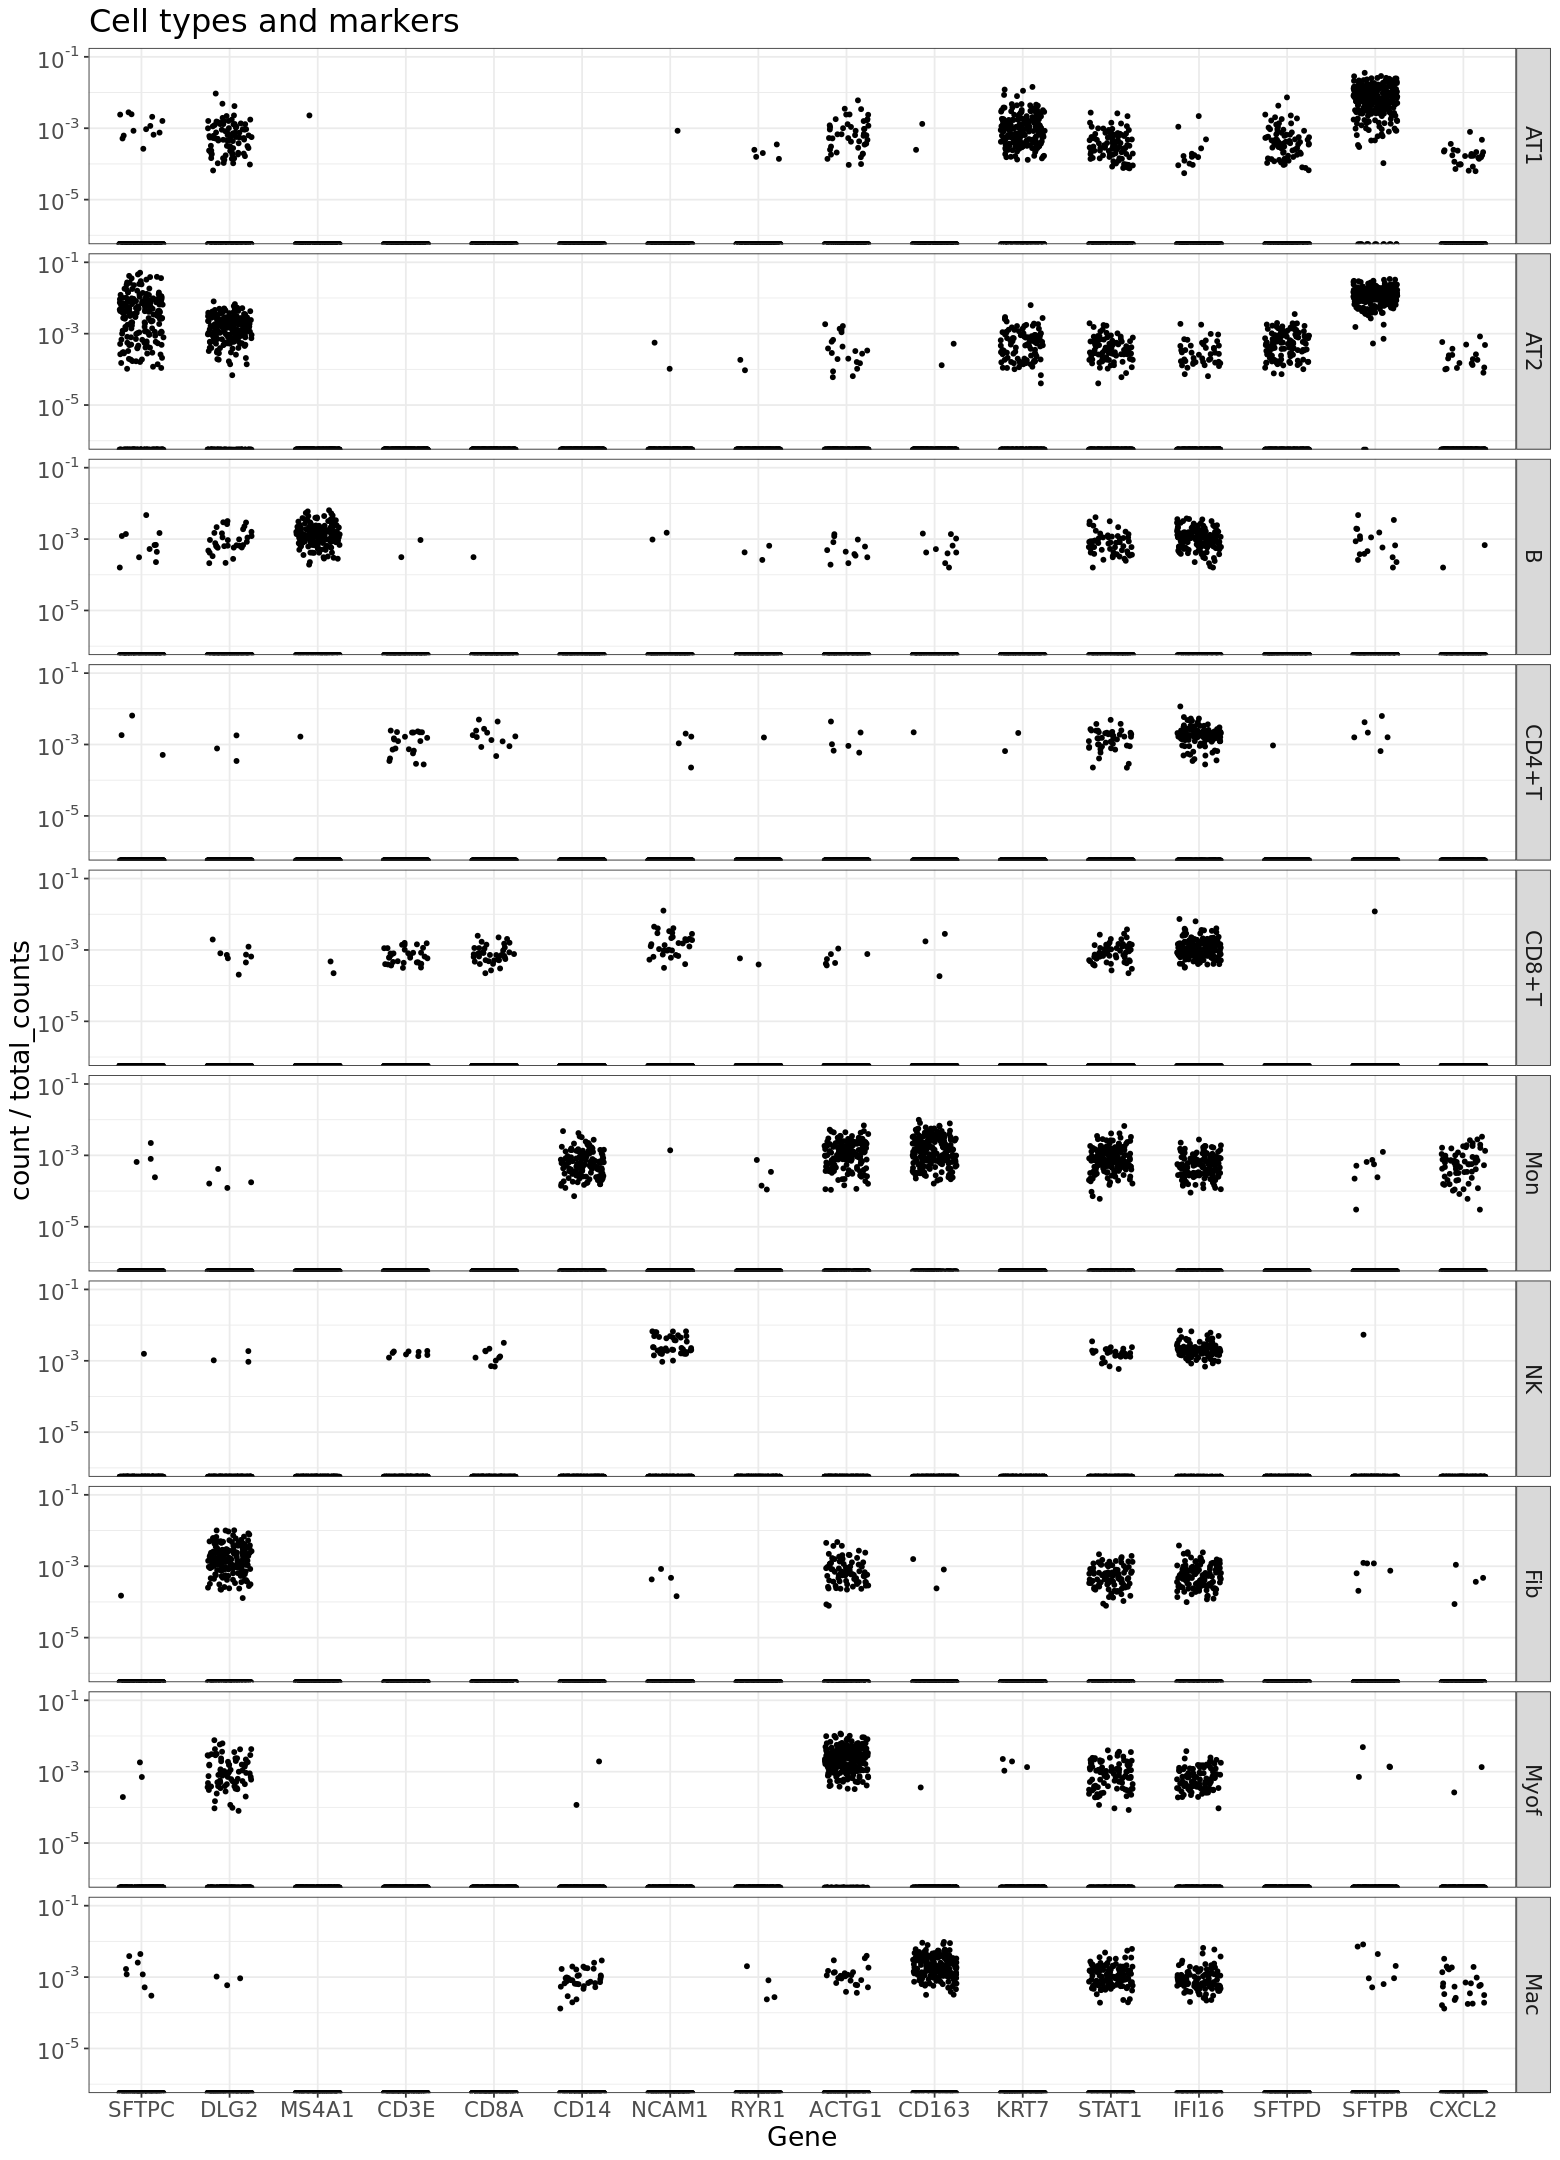

In [9]:
options(repr.plot.width = 13, repr.plot.height = 18)

(
    ggplot(data, aes(x = fct_relevel(gene, gene_order), y = count / n_UMI))
    + geom_jitter(size = 1, width = 0.25)
    + scale_y_log10(
        limits = c(1e-6, 1e-1),
        labels = scales::trans_format("log10", scales::math_format(10^.x))
    )
    + theme_bw()
    + facet_grid('fct_relevel(short_name, ct_order) ~ .')
    + theme(text = element_text(size=16))
    + labs(title = 'Cell types and markers', x = 'Gene', y = 'count / total_counts')
)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


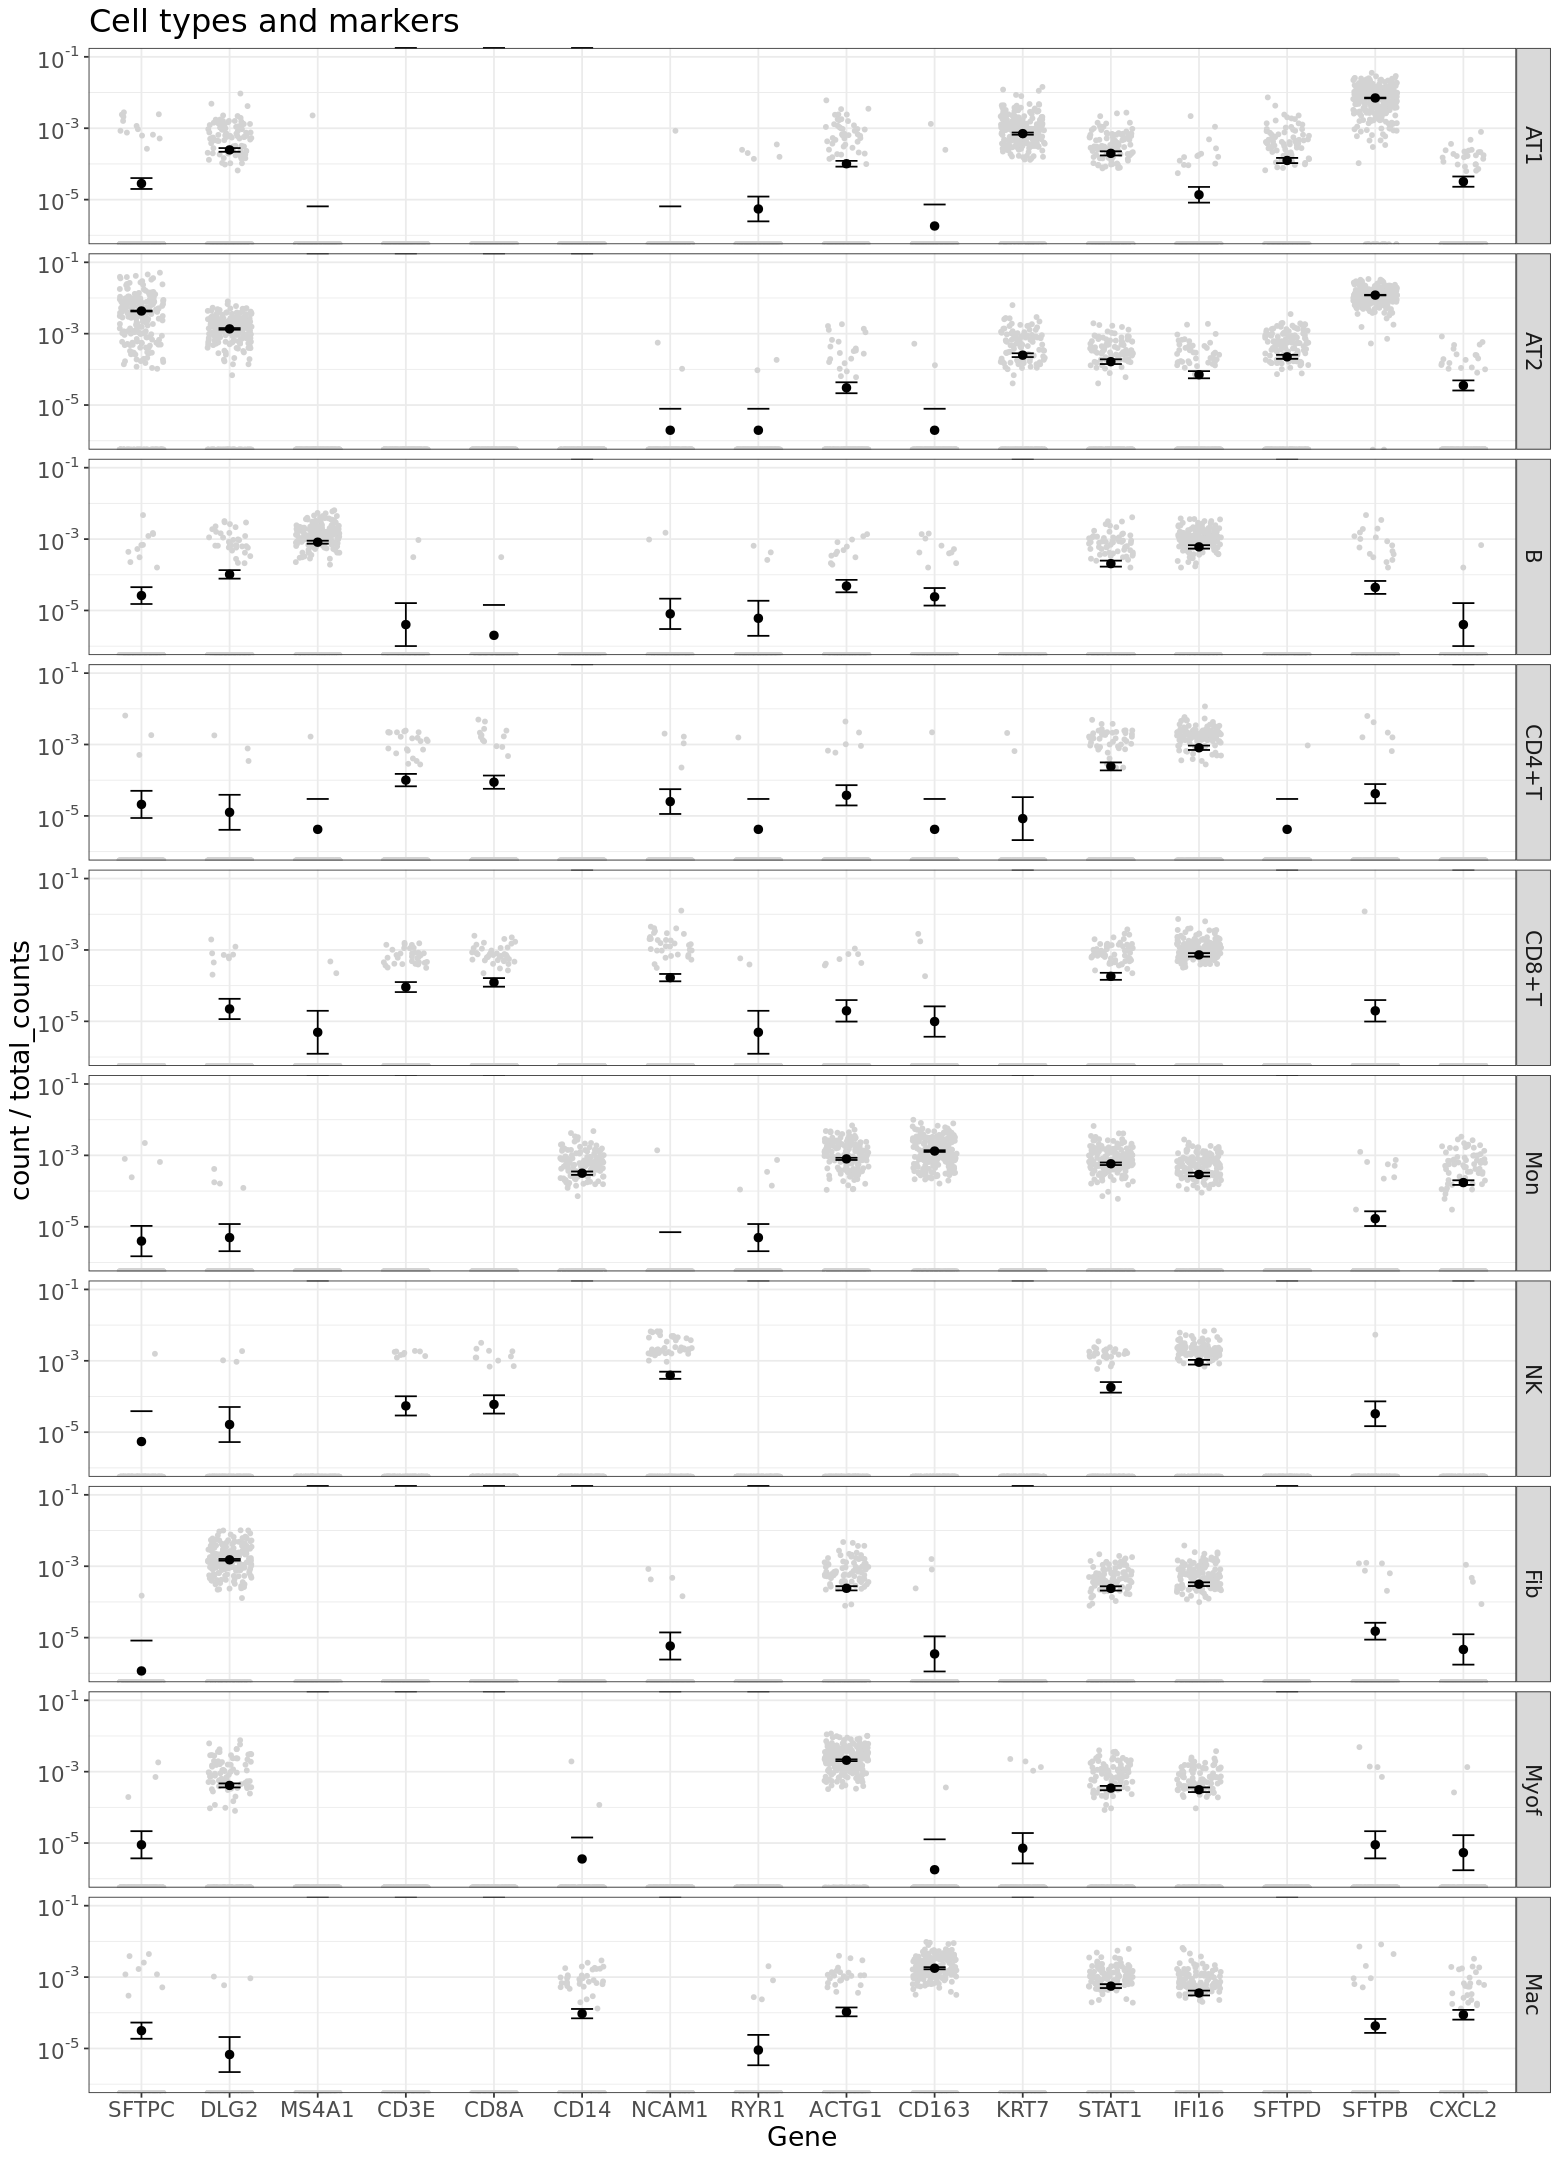

In [10]:
options(repr.plot.width = 13, repr.plot.height = 18)

(
    ggplot(results, aes(x = fct_relevel(gene, gene_order), y = rate))
    + geom_jitter(aes(y = count / n_UMI), color = 'lightgrey', size = 1, width = 0.25, data = data)
    + geom_point(size = 2)
    + geom_errorbar(aes(ymin = asymp.LCL, ymax = asymp.UCL), width = 0.25)
    + scale_y_log10(
        limits = c(1e-6, 1e-1),
        labels = scales::trans_format("log10", scales::math_format(10^.x))
    )
    + theme_bw()
    + facet_grid('fct_relevel(short_name, ct_order) ~ .')
    + theme(text = element_text(size=16))
    + labs(title = 'Cell types and markers', x = 'Gene', y = 'count / total_counts')
)

Warning message:
“Removed 52 rows containing missing values (geom_point).”


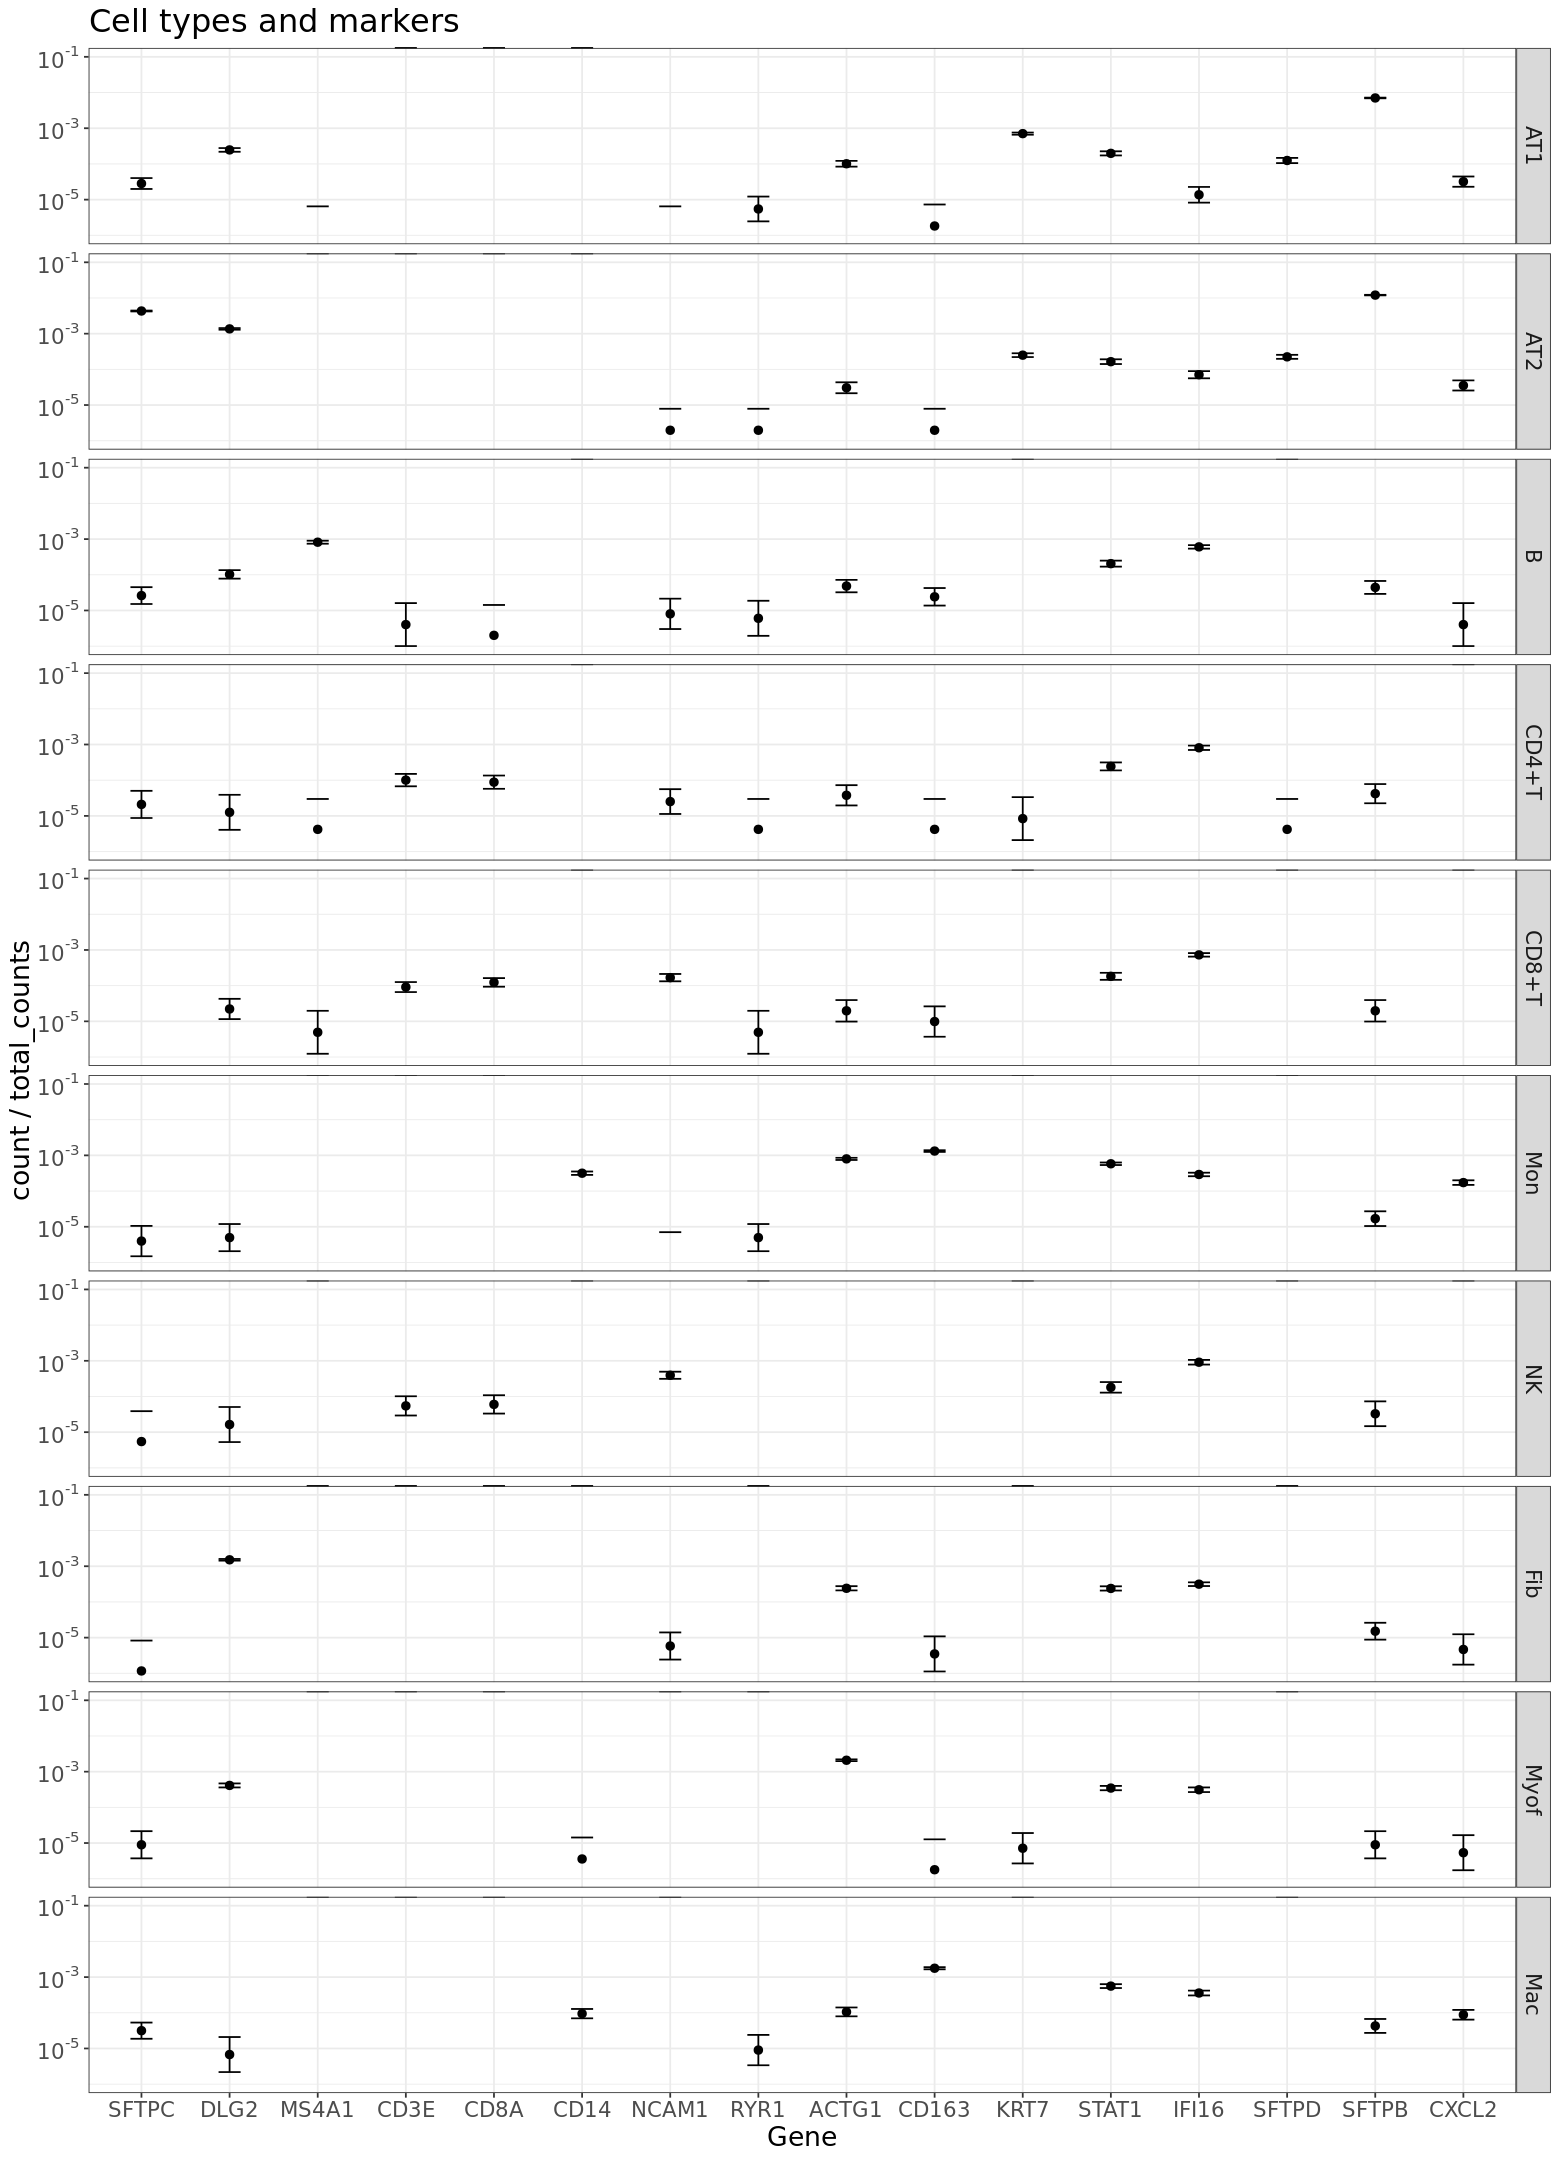

In [11]:
options(repr.plot.width = 13, repr.plot.height = 18)

(
    ggplot(results, aes(x = fct_relevel(gene, gene_order), y = rate))
    + geom_point(size = 2)
    + geom_errorbar(aes(ymin = asymp.LCL, ymax = asymp.UCL), width = 0.25)
    + scale_y_log10(
        limits = c(1e-6, 1e-1),
        labels = scales::trans_format("log10", scales::math_format(10^.x))
    )
    + theme_bw()
    + facet_grid('fct_relevel(short_name, ct_order) ~ .')
    + theme(text = element_text(size=16))
    + labs(title = 'Cell types and markers', x = 'Gene', y = 'count / total_counts')
)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


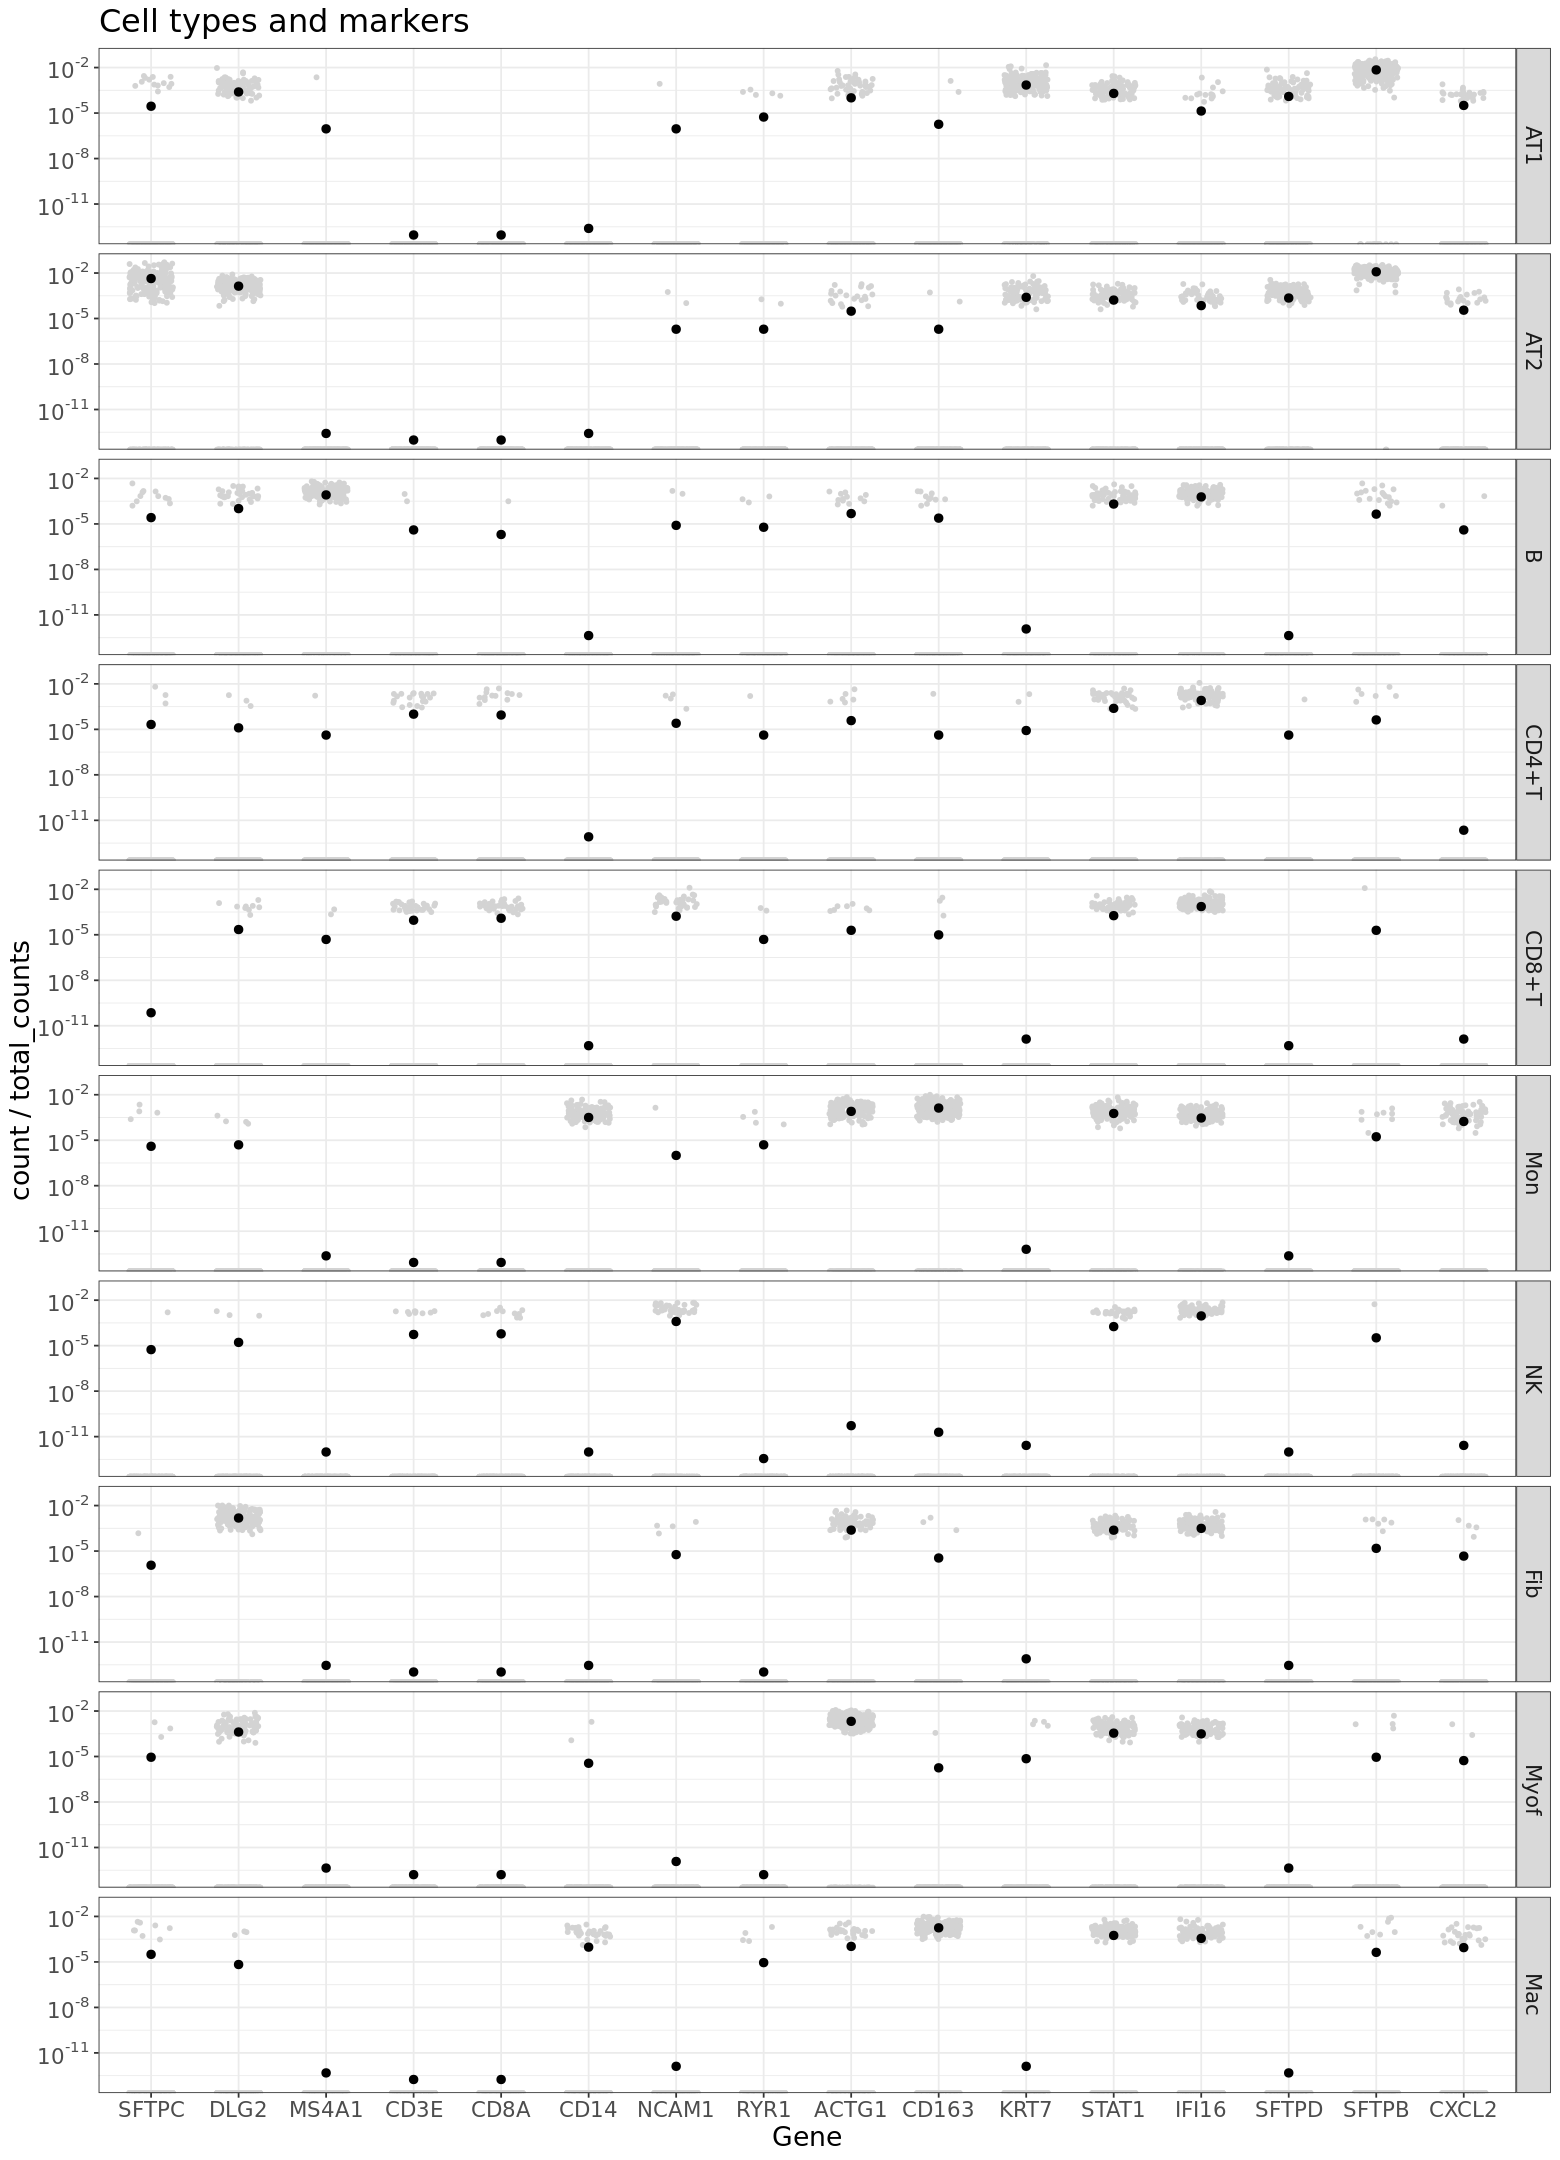

In [12]:
options(repr.plot.width = 13, repr.plot.height = 18)

(
    ggplot(results, aes(x = fct_relevel(gene, gene_order), y = rate))
    + geom_jitter(aes(y = count / n_UMI), color = 'lightgrey', size = 1, width = 0.25, data = data)
    + geom_point(size = 2)
#     + geom_errorbar(aes(ymin = asymp.LCL, ymax = asymp.UCL), width = 0.25)
    + scale_y_log10(
#         limits = c(1e-6, 1e-1),
        labels = scales::trans_format("log10", scales::math_format(10^.x))
    )
    + theme_bw()
    + facet_grid('fct_relevel(short_name, ct_order) ~ .')
    + theme(text = element_text(size=16))
    + labs(title = 'Cell types and markers', x = 'Gene', y = 'count / total_counts')
)

In [13]:
# Ratio of rates gives fold change
# Can do DE between any two cell types
# 
# https://timmastny.rbind.io/blog/tests-pairwise-categorical-mean-emmeans-contrast/

In [14]:
(
    fit1 %>%
    emmeans(specs = pairwise ~ short_name, type = 'response')
    %>% pluck('contrasts')
    %>% summary
    %>% arrange(desc(ratio))
    %>% mutate(gene = 'SFTPC')
)

contrast,ratio,SE,df,z.ratio,p.value,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AT2 / (CD8+T),5.965872e+07,6.679780e+09,Inf,0.15990627,1.000000e+00,SFTPC
AT1 / (CD8+T),3.906268e+05,4.373718e+07,Inf,0.11499410,1.000000e+00,SFTPC
B / (CD8+T),3.613813e+05,4.046273e+07,Inf,0.11429888,1.000000e+00,SFTPC
(CD4+T) / (CD8+T),2.901920e+05,3.249205e+07,Inf,0.11233890,1.000000e+00,SFTPC
AT2 / Fib,3.707219e+03,3.707642e+03,Inf,8.21710129,1.235678e-13,SFTPC
AT2 / Mon,1.086733e+03,5.436143e+02,Inf,13.97549640,0.000000e+00,SFTPC
AT2 / NK,7.899900e+02,7.900800e+02,Inf,6.67126029,1.140538e-09,SFTPC
AT2 / Myof,4.824935e+02,2.159005e+02,Inf,13.80872786,0.000000e+00,SFTPC
AT2 / (CD4+T),2.055836e+02,9.199215e+01,Inf,11.90219144,0.000000e+00,SFTPC


In [15]:
# Can also define a statistic for marker genes.
# Compare each cell type with the mean of the _other_ cell types
# 
# https://timmastny.rbind.io/blog/tests-pairwise-categorical-mean-emmeans-contrast/

In [16]:
(
    fit1 %>%
    emmeans(specs = del.eff ~ short_name, type = 'response')
    %>% pluck('contrasts')
    %>% summary
    %>% arrange(desc(ratio))
    %>% mutate(gene = 'SFTPC')
)

contrast,ratio,SE,df,z.ratio,p.value,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AT2 effect,1.590070e+03,1.978387e+04,Inf,0.592465082,0.9973265,SFTPC
Mac effect,6.727967e+00,8.372931e+01,Inf,0.153176238,0.9973265,SFTPC
AT1 effect,5.954529e+00,7.409466e+01,Inf,0.143381280,0.9973265,SFTPC
B effect,5.461298e+00,6.796686e+01,Inf,0.136413144,0.9973265,SFTPC
(CD4+T) effect,4.279854e+00,5.328447e+01,Inf,0.116780023,0.9973265,SFTPC
Myof effect,1.658666e+00,2.065051e+01,Inf,0.040643476,0.9973265,SFTPC
NK effect,9.590400e-01,1.197050e+01,Inf,-0.003350692,0.9973265,SFTPC
Mon effect,6.728933e-01,8.378900e+00,Inf,-0.031815532,0.9973265,SFTPC
Fib effect,1.721104e-01,2.148240e+00,Inf,-0.140975283,0.9973265,SFTPC
